# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate, Conv2D, MaxPooling2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_input_resnet, decode_predictions as decode_predictions_resnet
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications import ResNet50

2025-02-13 17:09:32.203821: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 17:09:32.216388: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739462972.225952    5872 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739462972.228969    5872 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 17:09:32.239469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

I0000 00:00:1739462981.489370    5872 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1739462981.489537    5872 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/20


I0000 00:00:1739462982.978867    5987 service.cc:148] XLA service 0x779fc000d890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739462982.978889    5987 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-13 17:09:42.997711: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739462983.106212    5987 cuda_dnn.cc:529] Loaded cuDNN version 90600
I0000 00:00:1739462985.717420    5987 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


422/422 - 9s - 21ms/step - accuracy: 0.9060 - loss: 0.2995 - val_accuracy: 0.9845 - val_loss: 0.0506
Epoch 2/20
422/422 - 2s - 4ms/step - accuracy: 0.9719 - loss: 0.0948 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 3/20
422/422 - 1s - 3ms/step - accuracy: 0.9791 - loss: 0.0699 - val_accuracy: 0.9915 - val_loss: 0.0309
Epoch 4/20
422/422 - 1s - 3ms/step - accuracy: 0.9829 - loss: 0.0575 - val_accuracy: 0.9925 - val_loss: 0.0261
Epoch 5/20
422/422 - 1s - 3ms/step - accuracy: 0.9849 - loss: 0.0502 - val_accuracy: 0.9932 - val_loss: 0.0266
Epoch 6/20
422/422 - 1s - 3ms/step - accuracy: 0.9862 - loss: 0.0456 - val_accuracy: 0.9927 - val_loss: 0.0251
Epoch 7/20
422/422 - 1s - 3ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 8/20
422/422 - 2s - 4ms/step - accuracy: 0.9888 - loss: 0.0358 - val_accuracy: 0.9935 - val_loss: 0.0257
Epoch 9/20
422/422 - 2s - 4ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9938 - val_loss: 0.0232
Epoch 10/20

2025-02-13 17:10:21.477939: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads



Exactitud en el conjunto de prueba: 99.51%


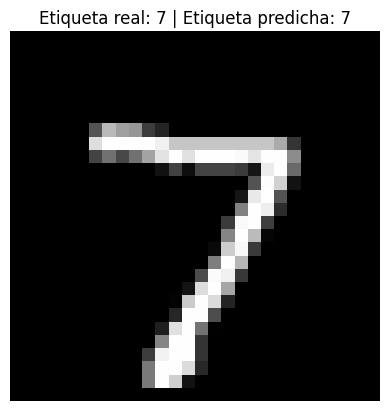

In [3]:
# Carga de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Si quisiéramos usar categorical_crossentropy, usamos to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Creación del modelo CNN
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu',padding="same"),
    Conv2D(32, (3, 3), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu',padding="same"),
    Conv2D(64, (3, 3), activation='relu',padding="same"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #Salida
])

# Compilación del modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Usamos sparse por las etiquetas enteras
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, batch_size=128, 
                    validation_split=0.1, verbose=2)

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_acc * 100:.2f}%")

# Predicción y visualización de resultados
def plot_prediction(index):
    image = x_test[index].reshape(28, 28)
    true_label = y_test[index]
    pred_label = np.argmax(model.predict(x_test[index:index+1], verbose=0))

    plt.imshow(image, cmap='gray')
    plt.title(f"Etiqueta real: {true_label} | Etiqueta predicha: {pred_label}")
    plt.axis('off')
    plt.show()

# Ejemplo: visualización de una predicción
plot_prediction(0)

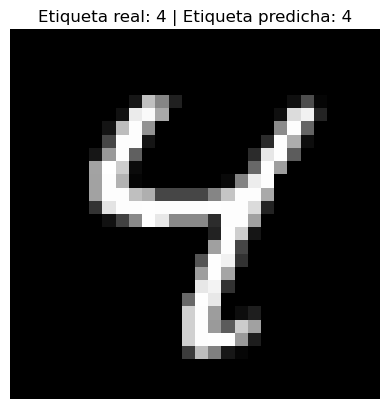

In [11]:
plot_prediction(6)

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Foto: raton.jpg
 - mousetrap: 37.12%
 - hamster: 34.19%
 - fox_squirrel: 23.69%


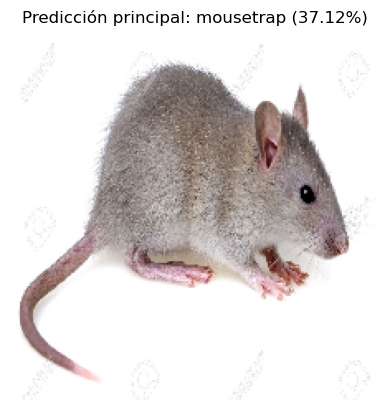

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: bisturi.jpeg
 - letter_opener: 70.47%
 - corkscrew: 12.01%
 - scabbard: 9.88%


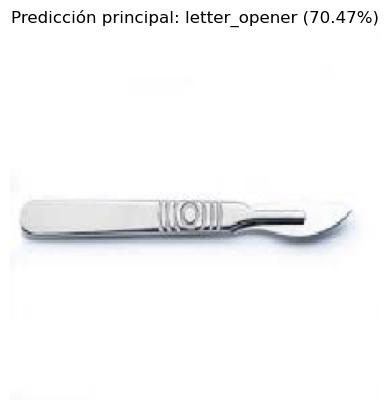

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: maserati.jpeg
 - sports_car: 99.73%
 - racer: 0.23%
 - car_wheel: 0.03%


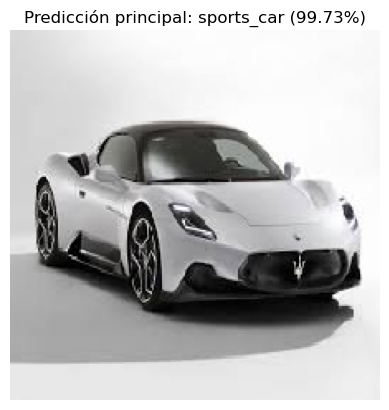

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Foto: bicicleta.jpeg
 - mountain_bike: 99.56%
 - tricycle: 0.22%
 - bicycle-built-for-two: 0.18%


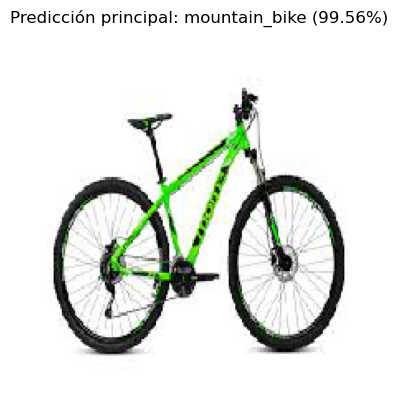

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Foto: cascos.jpg
 - hair_slide: 98.12%
 - chain: 0.69%
 - knot: 0.27%


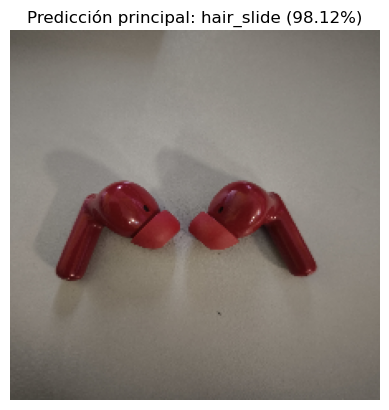

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Foto: papelera.jpg
 - ashcan: 77.80%
 - folding_chair: 12.87%
 - desk: 1.78%


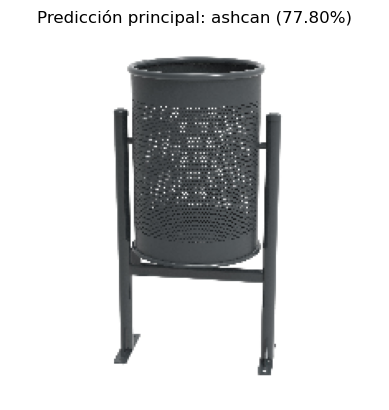

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Foto: kiwi.jpeg
 - Granny_Smith: 78.28%
 - banana: 7.33%
 - custard_apple: 3.85%


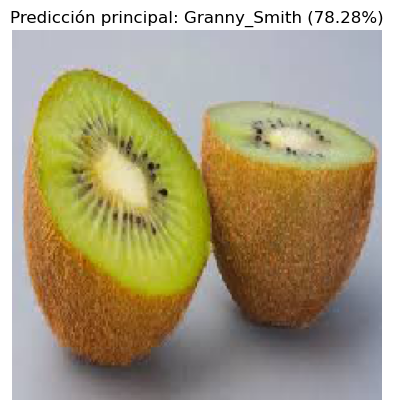

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Foto: aguacates.jpg
 - buckeye: 65.88%
 - hotdog: 29.62%
 - acorn: 1.60%


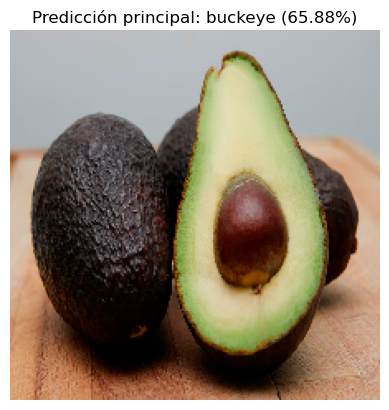

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Foto: nave_espacial.jpg
 - space_shuttle: 99.71%
 - missile: 0.16%
 - projectile: 0.13%


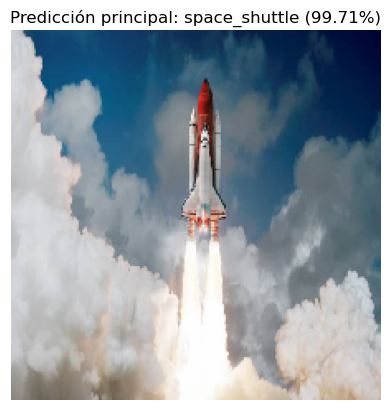

In [9]:
# Ruta de las fotos
ruta_fotos = "fotos/ejercicio2"  # Cambia esto por la ruta donde están tus imágenes
fotos = os.listdir(ruta_fotos)

# Carga del modelo preentrenado
modelo = ResNet101V2(weights="imagenet")

# Procesar y predecir cada imagen
for foto in fotos:
    # Cargar la imagen
    ruta_foto = os.path.join(ruta_fotos, foto)
    img = load_img(ruta_foto, target_size=(224, 224))  # Redimensionar la imagen a 224x224
    img_array = img_to_array(img)  # Convertir a array
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para batch
    img_array = preprocess_input_resnet(img_array)  # Uso explícito de preprocess_input para ResNet101V2
    
    # Hacer predicción
    predicciones = modelo.predict(img_array)
    etiquetas = decode_predictions_resnet(predicciones, top=3)[0]  # Uso explícito de decode_predictions

    # Mostrar resultados
    print(f"Foto: {foto}")
    for etiqueta in etiquetas:
        print(f" - {etiqueta[1]}: {etiqueta[2]*100:.2f}%")
    
    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f"Predicción principal: {etiquetas[0][1]} ({etiquetas[0][2]*100:.2f}%)")
    plt.axis("off")
    plt.show()

## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

2025-02-03 16:03:54.946723: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-02-03 16:03:55.033289: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


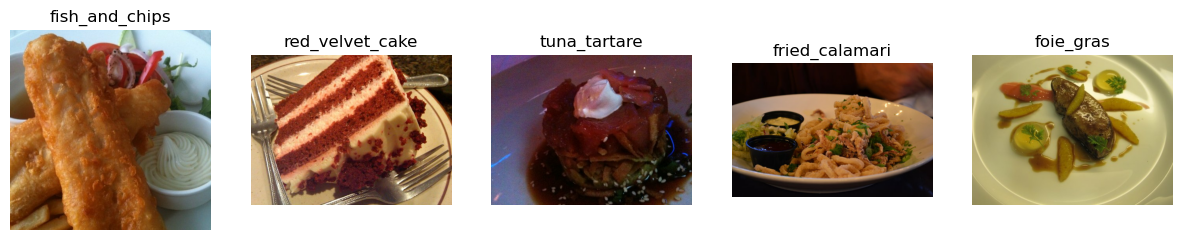

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387,365 (9.11 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


2025-02-03 16:03:59.317489: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 324 bytes spill stores, 320 bytes spill loads

2025-02-03 16:03:59.317531: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 4 bytes spill stores, 4 bytes spill loads

2025-02-03 16:03:59.481112: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 376 bytes spill stores, 376 bytes spill loads

2025-02-03 16:03:59.490481: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 400 bytes spill stores, 400 bytes spill loads

2025-02-03 16:03:59.526508: I external/local_xla/xla/str

4734/4735 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4631 - loss: 2.2057

2025-02-03 16:09:57.109411: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 620 bytes spill stores, 620 bytes spill loads

2025-02-03 16:09:57.202079: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 104 bytes spill stores, 104 bytes spill loads

2025-02-03 16:09:57.209132: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 524 bytes spill stores, 524 bytes spill loads

2025-02-03 16:09:57.381911: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 556 bytes spill stores, 556 bytes spill loads

E0000 00:00:1738595398.521457    5797 gpu_timer.cc:8

4735/4735 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4631 - loss: 2.2056

2025-02-03 16:10:07.295338: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 8 bytes spill stores, 8 bytes spill loads

2025-02-03 16:10:07.487028: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 460 bytes spill stores, 304 bytes spill loads

2025-02-03 16:10:07.530790: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 576 bytes spill stores, 672 bytes spill loads

2025-02-03 16:10:07.580886: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 720 bytes spill stores, 708 bytes spill loads

E0000 00:00:1738595408.961148    5796 gpu_timer.cc:82] D

4735/4735 ━━━━━━━━━━━━━━━━━━━━ 374s 77ms/step - accuracy: 0.4631 - loss: 2.2055 - val_accuracy: 0.6172 - val_loss: 1.4710
Epoch 2/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 352s 74ms/step - accuracy: 0.6263 - loss: 1.4302 - val_accuracy: 0.6141 - val_loss: 1.4791
Epoch 3/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 353s 75ms/step - accuracy: 0.6620 - loss: 1.2802 - val_accuracy: 0.6152 - val_loss: 1.4935
Epoch 4/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 348s 74ms/step - accuracy: 0.6858 - loss: 1.1820 - val_accuracy: 0.6147 - val_loss: 1.5098
Epoch 5/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 350s 74ms/step - accuracy: 0.6956 - loss: 1.1250 - val_accuracy: 0.6159 - val_loss: 1.5221
Epoch 6/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 353s 75ms/step - accuracy: 0.7101 - loss: 1.0732 - val_accuracy: 0.6128 - val_loss: 1.5666
Epoch 7/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 353s 75ms/step - accuracy: 0.7155 - loss: 1.0419 - val_accuracy: 0.6109 - val_loss: 1.5855
Epoch 8/10
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 354s 75ms/step - accuracy: 0.7247 - lo

2025-02-03 17:03:13.792196: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6224', 468 bytes spill stores, 468 bytes spill loads



4734/4735 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4878 - loss: 2.2008

2025-02-03 17:09:30.034856: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6224', 104 bytes spill stores, 104 bytes spill loads



4735/4735 ━━━━━━━━━━━━━━━━━━━━ 393s 81ms/step - accuracy: 0.4878 - loss: 2.2006 - val_accuracy: 0.6219 - val_loss: 1.5111
Epoch 2/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 370s 78ms/step - accuracy: 0.6854 - loss: 1.1315 - val_accuracy: 0.6536 - val_loss: 1.3761
Epoch 3/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 366s 77ms/step - accuracy: 0.7500 - loss: 0.8951 - val_accuracy: 0.6680 - val_loss: 1.3320
Epoch 4/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 360s 76ms/step - accuracy: 0.7945 - loss: 0.7341 - val_accuracy: 0.6730 - val_loss: 1.3057
Epoch 5/5
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 351s 74ms/step - accuracy: 0.8278 - loss: 0.6213 - val_accuracy: 0.6810 - val_loss: 1.2949
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6726 - loss: 1.2892
Precisión en el conjunto de prueba: 0.6718


In [10]:
# CARGAR DATOS
data_dir = "/home/iabd/Documentos/tensorflow_datasets"

# Cargar el dataset food101
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation[:50%]', 'validation[50%:]'],
    shuffle_files=True,
    data_dir=data_dir,
    with_info=True,
    as_supervised=True
)

# EXPLORAR DATOS
# Función para mostrar imágenes
def show_images(dataset, num_images=5):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(ds_info.features['label'].int2str(label))
        plt.axis('off')
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
show_images(ds_train)

# PROCESAR DATOS
# Tamaño deseado para las imágenes
IMG_SIZE = 224

# Función para redimensionar y normalizar las imágenes
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input_resnet(image)  # Uso correcto de preprocess_input para MobileNetV2
    return image, label

# Función para aumentar los datos
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
    return image, label

# Aplicar transformaciones a los conjuntos de datos
ds_train_augmented = ds_train.map(augment_image)
ds_train_preprocessed = ds_train.map(preprocess_image)
ds_train_augmented_preprocessed = ds_train_augmented.map(preprocess_image)

# Concatenar el dataset original con el aumentado
ds_train_final = ds_train_preprocessed.concatenate(ds_train_augmented_preprocessed)

# Agrupar y optimizar la carga de datos
ds_train_final = ds_train_final.batch(32).prefetch(tf.data.AUTOTUNE)
ds_validation = ds_validation.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Cargar MobileNetV2 sin la última capa y con pesos preentrenados en ImageNet
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar el modelo base para la primera fase de entrenamiento
base_model.trainable = False

# CONSTRUIR MODELO
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(101, activation='softmax')  # 101 clases en food101
])

# COMPILAR MODELO
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

# ENTRENAMIENTO FASE 1 (con capas congeladas)
history = model.fit(
    ds_train_final,
    validation_data=ds_validation,
    epochs=10
)

# Descongelar las últimas capas del modelo base para afinar el entrenamiento
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Congelar las primeras capas y entrenar las últimas 30
    layer.trainable = False

# Recompilar el modelo con una tasa de aprendizaje menor para ajuste fino
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ENTRENAMIENTO FASE 2 (con capas descongeladas)
history_fine_tune = model.fit(
    ds_train_final,
    validation_data=ds_validation,
    epochs=5  
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(ds_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
La clase predicha es: hot_dog


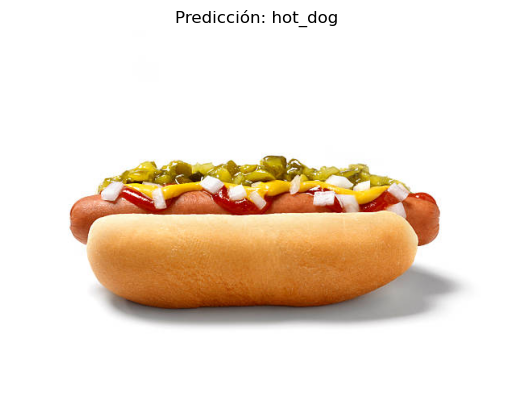

In [13]:
# Ruta de la imagen externa
image_path = "fotos/ejercicio3/perrito_caliente.jpg"

# Tamaño de la imagen definido en el modelo
IMG_SIZE = 224

# Preprocesar la imagen externa
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))  # Cargar y redimensionar
image_array = img_to_array(image)  # Convertir la imagen a un array numpy
image_array = tf.expand_dims(image_array, axis=0)  # Añadir dimensión batch
image_array = preprocess_input_mobilenet(image_array)  # Normalizar

# Realizar predicción
predictions = model.predict(image_array)
predicted_class_index = np.argmax(predictions)  # Índice de la clase predicha
predicted_class = ds_info.features['label'].int2str(predicted_class_index)  # Nombre de la clase

# Imprimir la clase predicha
print(f"La clase predicha es: {predicted_class}")

# Mostrar la imagen con la predicción
plt.imshow(load_img(image_path))  # Mostrar la imagen original
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()


## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

In [4]:
# Directorio donde están las imágenes descargadas
ruta_imagenes = "/home/iabd/Documentos/tensorflow_datasets/perros"

# Cargar todos los datos
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
ruta_imagenes,
image_size=(224, 224),
batch_size=32,
shuffle=True, # Aseguramos que los datos se mezclen
seed=123
)

# Dividir los datos en tres partes: entrenamiento, validación y prueba
total_size = sum(1 for _ in full_dataset) # Total de imágenes
train_size = int(0.8 * total_size) # 80% para entrenamiento
valid_size = int(0.1 * total_size) # 10% para validación
test_size = total_size - train_size - valid_size # El resto para prueba

# Dividimos el conjunto completo en tres partes
ds_train = full_dataset.take(train_size)
ds_val = full_dataset.skip(train_size).take(valid_size)
ds_test = full_dataset.skip(train_size + valid_size).take(test_size)

# Información sobre los datos cargados
class_names = full_dataset.class_names
print(f"Clases de perros: {class_names}")

# Preprocesamiento de los datos para mejorar el rendimiento de carga
AUTOTUNE = tf.data.AUTOTUNE
#ds = ds.cache().prefetch(buffer_size=AUTOTUNE)
#ds_validation = ds_validation.cache().prefetch(buffer_size=AUTOTUNE)

Found 20580 files belonging to 120 classes.
Clases de perros: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk

2025-02-13 17:10:34.214233: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Dimensiones de las imágenes: (None, 224, 224, 3)
Cantidad de batches en el conjunto de entrenamiento: 644


2025-02-13 17:10:35.974502: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


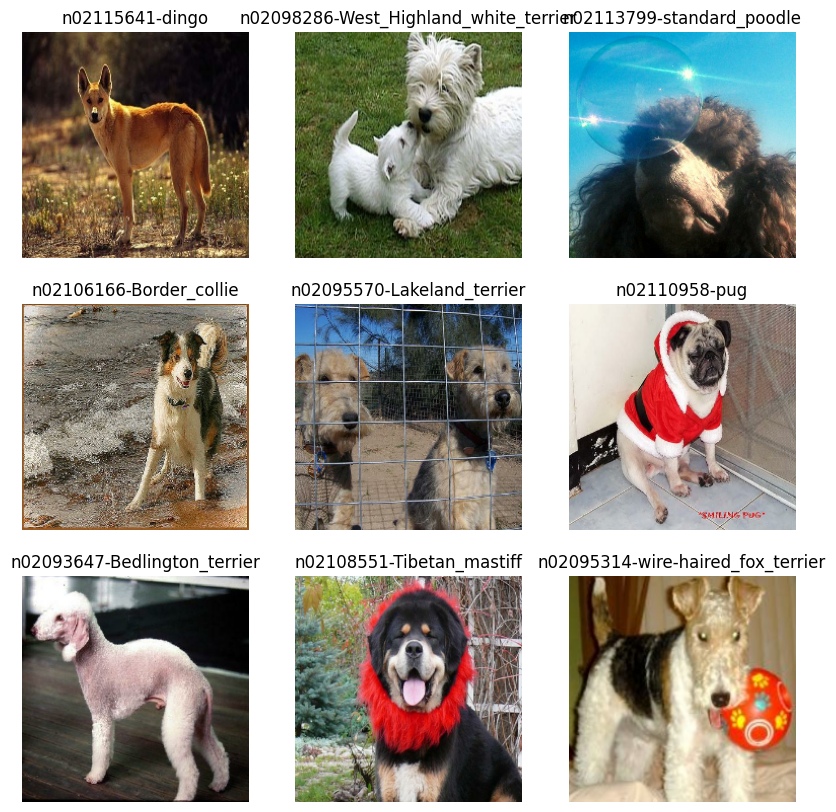

In [5]:
# Exploración de los datos:
# 1. Dimensiones de las imágenes y tamaños de los lotes (batches)
print(f"Dimensiones de las imágenes: {full_dataset.element_spec[0].shape}")
print(f"Cantidad de batches en el conjunto de entrenamiento: {len(full_dataset)}")
#print(f"Cantidad de batches en el conjunto de validación: {len(ds_validation)}")

# Mostrar algunas imágenes con sus etiquetas
def show_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(1)):  # Tomar un batch de imágenes
        for j in range(min(num_images, len(images))):
            plt.subplot(3, 3, j + 1)
            plt.imshow(images[j].numpy().astype("uint8"))
            plt.title(class_names[labels[j]])  # Mostrar la etiqueta (nombre de la clase)
            plt.axis("off")
    plt.show()

# Mostrar algunas imágenes con sus etiquetas
show_images(full_dataset)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast, Resizing, Lambda

# PREPARAR LOS DATOS
data_augmentation = tf.keras.Sequential([
RandomFlip(mode="horizontal", seed=42), # Volteo aleatorio horizontal
RandomRotation(factor=0.05, seed=42), # Rotacion aleatoria
RandomContrast(factor=0.2, seed=42), # Contraste aleatorio
])

# Se aplica a todo: nuevos datos y los originales (train, valid y test)
dim_imagen = tf.keras.Sequential([
Resizing(height=224, width=224, crop_to_aspect_ratio=True), # Escalar la imagen a 224 x 224
Lambda(tf.keras.applications.mobilenet_v2.preprocess_input) # Preprocesamiento
])

# Aplico el redimensionado de imagenes al dataset de entrenamiento original
#train_dataset_original = train_dataset.map(lambda x, y: (dim_imagen(x), y), num_parallel_calls=tf.data.AUTOTUNE)

# Aplico el aumento de datos y el redimensionado de imagenes a las nuevas imagenes (dataset entrenamiento)
train_dataset_augmentation = ds_train.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)
train_dataset_original = ds_train.map(lambda x, y: (dim_imagen(x), y), num_parallel_calls=tf.data.AUTOTUNE)
# Concateno los dos datasets
train_dataset_combination = train_dataset_original.concatenate(train_dataset_augmentation)

# Aplico el redimensionado de imagenes a los demas datasets (validacion y pruebas)
valid_dataset_original = ds_val.map(lambda x, y: (dim_imagen(x), y), num_parallel_calls=tf.data.AUTOTUNE)
test_dataset_original = ds_test.map(lambda x, y: (dim_imagen(x), y), num_parallel_calls=tf.data.AUTOTUNE)

In [7]:
IMG_SIZE = 224

# CREAR EL MODELO USANDO ResNet50
base_model = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Congelar capas preentrenadas

# Modelo completo
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(len(class_names), activation="softmax")  # Clases del dataset
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# ENTRENAR CON CAPAS CONGELADAS
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=10
)

# DESCONGELAR CAPAS Y REENTRENAR
base_model.trainable = True
for layer in base_model.layers[:100]:  # Congelar las primeras 100 capas
    layer.trainable = False

# Compilar nuevamente con tasa de aprendizaje más baja
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Segundo entrenamiento
history_fine_tune = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5
)

# EVALUAR EL MODELO
test_loss, test_acc = model.evaluate(ds_test)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_acc:.4f}")

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1992 - loss: 3.9733

2025-02-13 17:11:16.984733: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696', 204 bytes spill stores, 204 bytes spill loads



515/515 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.1994 - loss: 3.9714 - val_accuracy: 0.5605 - val_loss: 1.5856
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.5355 - loss: 1.7448 - val_accuracy: 0.5986 - val_loss: 1.4857
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.6025 - loss: 1.4433 - val_accuracy: 0.6221 - val_loss: 1.4651
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.6359 - loss: 1.2825 - val_accuracy: 0.6108 - val_loss: 1.4989
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.6624 - loss: 1.1759 - val_accuracy: 0.6387 - val_loss: 1.4382
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.6813 - loss: 1.1152 - val_accuracy: 0.6304 - val_loss: 1.4762
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.6938 - loss: 1.0641 - val_accuracy: 0.6279 - val_loss: 1.5280
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.7019 - loss: 1.0242 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
La clase predicha es: n02095570-Lakeland_terrier


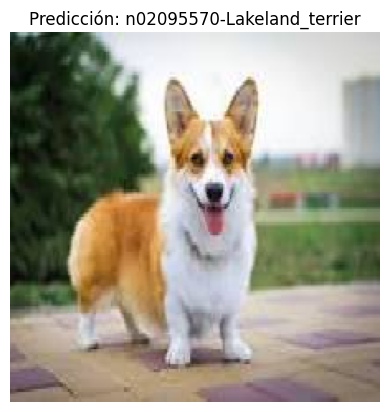

In [8]:
# HACER UNA PREDICCIÓN CON UNA IMAGEN DE INTERNET

# Cargar una imagen desde Internet
image_path = "fotos/ejercicio4/corgi.jpeg"  # Ruta de la imagen
image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
image_array = img_to_array(image)
image_array = tf.expand_dims(image_array, axis=0)  # Añadir dimensión batch
image_array = preprocess_input_resnet(image_array)

# Predicción
predictions = model.predict(image_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"La clase predicha es: {predicted_class}")

# Mostrar la imagen
plt.imshow(image)
plt.title(f"Predicción: {predicted_class}")
plt.axis("off")
plt.show()

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

In [11]:
import tensorflow as tf  # Importa la librería TensorFlow como 'tf' para trabajar con redes neuronales
import tensorflow_hub as hub  # Importa la librería TensorFlow Hub para cargar modelos preentrenados

# Configura la variable de entorno para cargar modelos comprimidos desde TensorFlow Hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRE'

import IPython.display as display  # Importa la librería IPython.display para mostrar imágenes y otros objetos en Jupyter Notebooks

import matplotlib.pyplot as plt  # Importa matplotlib.pyplot como 'plt' para crear gráficos
import matplotlib as mpl  # Importa la librería matplotlib como 'mpl' para configurar parámetros globales de los gráficos
mpl.rcParams['figure.figsize'] = (12, 12)  # Ajusta el tamaño de las figuras de los gráficos generados
mpl.rcParams['axes.grid'] = False  # Desactiva las cuadrículas en los ejes de los gráficos

import numpy as np  # Importa NumPy como 'np' para trabajar con matrices y operaciones matemáticas
import PIL.Image  # Importa la librería Pillow (PIL) para trabajar con imágenes
import time  # Importa la librería time para trabajar con temporizadores y medir el tiempo de ejecución
import functools  # Importa functools para utilizar funciones de orden superior

def tensor_to_image(tensor):
    """
    Convierte un tensor de imágenes en una imagen PIL (formato de imagen estándar).
    El tensor debe estar en el rango [0, 1], y la conversión multiplicará por 255 para
    traerlo al rango estándar de 0-255 para una imagen de 8 bits por canal.
    """
    tensor = tensor * 255  # Multiplica el tensor por 255 para convertirlo al rango de valores de una imagen estándar
    tensor = np.array(tensor, dtype=np.uint8)  # Convierte el tensor a un arreglo de tipo uint8 (enteros de 8 bits)
    
    if np.ndim(tensor) > 3:  # Si el tensor tiene más de 3 dimensiones (probablemente por un lote de imágenes)
        assert tensor.shape[0] == 1  # Asegura que el tamaño del lote sea 1
        tensor = tensor[0]  # Si hay un solo elemento en el lote, toma solo la primera imagen
    
    return PIL.Image.fromarray(tensor)  # Convierte el arreglo de NumPy a una imagen PIL y la devuelve



In [12]:
# Ruta para coger la imagen del contenido "perro"
content_path = tf.keras.utils.get_file('raza-perro-pastor-de-los-pirineos.jpg', 'https://www.perrosamigos.com/Uploads/perrosamigos.com/ImagenesGrandes/raza-perro-pastor-de-los-pirineos.jpg')
#Ruta para coger la imagen del estilo "graffiti"
style_path = tf.keras.utils.get_file('Expresionismo_abtracto.jpg','https://cdn.shopify.com/s/files/1/0278/9628/3224/files/expresionismo-abstracto-pintura-de-retne.jpg?v=1642045498')


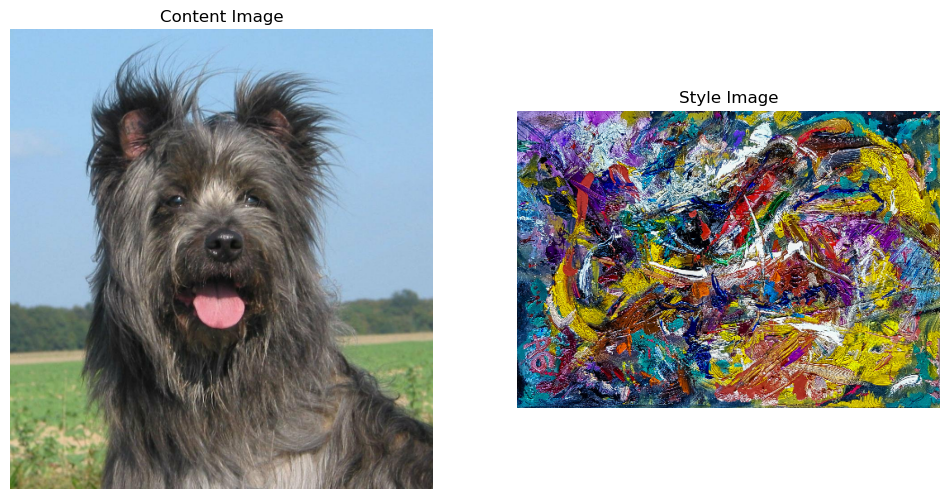

In [13]:
# Función para cargar imagen
def load_img(path_to_img):
    max_dim = 512  # Dimensión máxima de la imagen
    img = tf.io.read_file(path_to_img)  # Leer la imagen desde el archivo
    img = tf.image.decode_image(img, channels=3)  # Decodificar la imagen, asegurándose de que tenga 3 canales (RGB)
    img = tf.image.convert_image_dtype(img, tf.float32)  # Convertir la imagen a tipo float32, normalizando los valores de píxeles a [0, 1]

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)  # Obtener las dimensiones de la imagen sin contar el canal de color
    long_dim = max(shape)  # Determinar cuál es la dimensión más larga (alto o ancho de la imagen)
    scale = max_dim / long_dim  # Calcular el factor de escala para redimensionar la imagen

    new_shape = tf.cast(shape * scale, tf.int32)  # Aplicar el factor de escala a las dimensiones de la imagen para obtener la nueva forma

    img = tf.image.resize(img, new_shape)  # Redimensionar la imagen al nuevo tamaño
    img = img[tf.newaxis, :]  # Añadir una nueva dimensión al principio (batch dimension)
    return img

# Función para mostrar una imagen
def imshow(image, title):
    # Eliminar la dimensión de batch
    image = tensor_to_image(image)  # Convertir el tensor de vuelta a una imagen procesable
    plt.imshow(image)  # Mostrar la imagen
    plt.title(title)  # Añadir un título a la imagen
    plt.axis('off')  # Opcional: Desactivar los ejes

# Cargar las imágenes de contenido y estilo
content_image = load_img(content_path)
style_image = load_img(style_path)

# Mostrar ambas imágenes en un solo gráfico
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')  # Mostrar la imagen de contenido

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')  # Mostrar la imagen de estilo

In [14]:
import os
import tensorflow_hub as hub

os.environ["TFHUB_CACHE_DIR"] = os.path.expanduser("~/.tfhub_modules")

model_url = "https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2"
style_transfer_model = hub.load(model_url)

UnimplementedError: File system scheme 'https' not implemented (file: 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

I0000 00:00:1738604457.804538   22199 cuda_dnn.cc:529] Loaded cuDNN version 90600


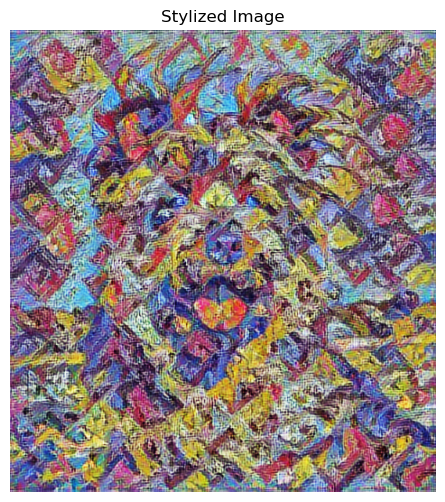

In [6]:
# Aplicar el modelo a la imagen de contenido y estilo
stylized_image = style_transfer_model(tf.constant(content_image), tf.constant(style_image))[0]

# Mostrar la imagen generada
plt.figure(figsize=(6, 6))
imshow(stylized_image, 'Stylized Image')
plt.show()

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


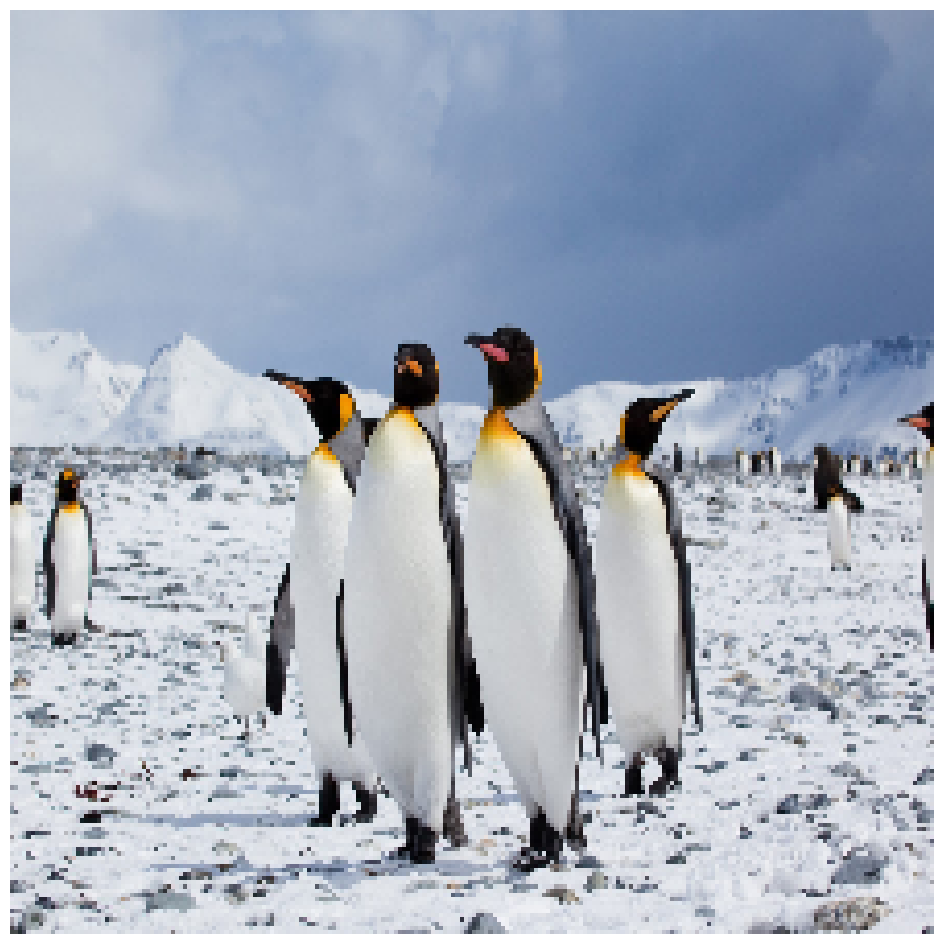

Dimensiones del tensor de la imagen: (1, 224, 224, 3)


In [8]:
# Ruta de la imagen
image_path = "fotos/pinguino.jpeg"

# Cargar la imagen
image = tf.keras.preprocessing.image.load_img(image_path)

# Convertir la imagen a un array de NumPy
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Redimensionar la imagen a un tamaño estándar (por ejemplo, 224x224)
image_resized = tf.image.resize(image_array, (224, 224))

# Añadir la dimensión de batch
image_batch = np.expand_dims(image_resized, axis=0)

# Mostrar la imagen procesada
plt.imshow(image_resized.numpy().astype("uint8"))
plt.axis("off")
plt.show()

# Dimensiones de la imagen preparada
print("Dimensiones del tensor de la imagen:", image_batch.shape)

Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

In [9]:
# Definir el filtro de detección de bordes
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

# Ajustar la forma del filtro para que sea compatible con una capa convolucional
# Forma esperada: (altura, anchura, canales_entrada, canales_salida)
filtro = filtro.reshape((3, 3, 3, 1))

# Verificar la nueva forma del filtro
print("Forma del filtro:", filtro.shape)

Forma del filtro: (3, 3, 3, 1)


Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

In [10]:
# Crear un modelo secuencial con una única capa convolucional
modelo = Sequential([
        Conv2D(
        filters=1,  # Solo un filtro de salida
        kernel_size=(3, 3),  # Tamaño del filtro
        padding="same",  # Mantener el tamaño de la imagen
        input_shape=(224, 224, 3),  # Tamaño de la imagen de entrada
        use_bias=False  # No necesitamos sesgo en este caso
    )
])

# Asignar los pesos de la convolución al filtro personalizado
modelo.layers[0].set_weights([filtro])

# Congelar la capa para evitar que los pesos se actualicen en entrenamiento
modelo.layers[0].trainable = False

# Resumen del modelo
modelo.summary()

/home/iabd/anaconda3/envs/sapa/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 1)    │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 27 (108.00 B)

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


I0000 00:00:1738604502.513296   22206 service.cc:148] XLA service 0x789b3c003190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738604502.513328   22206 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
I0000 00:00:1738604502.641431   22206 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


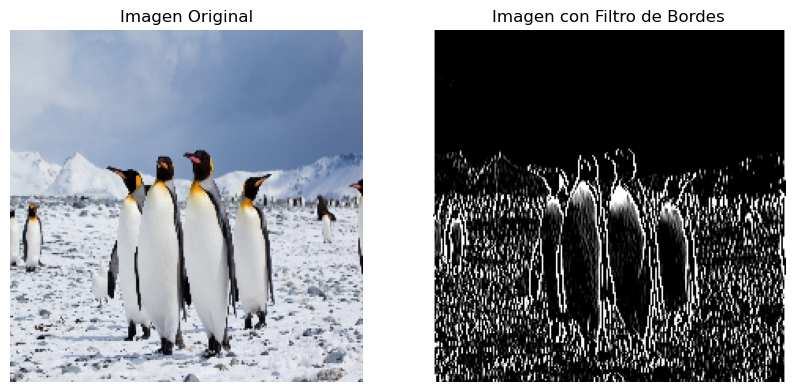

In [11]:
# Aplicar el modelo convolucional con el filtro personalizado
filtered_image = modelo.predict(image_batch)

# Quitar la dimensión de batch y convertir a valores válidos de imagen
filtered_image = np.squeeze(filtered_image)  # Eliminar dimensión extra
filtered_image = np.clip(filtered_image, 0, 255).astype("uint8")  # Normalizar valores

# Visualizar la imagen original y la filtrada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_resized.numpy().astype("uint8"))
plt.title("Imagen Original")
plt.axis("off")

# Imagen con el filtro aplicado
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap="gray")  # Mostrar en escala de grises
plt.title("Imagen con Filtro de Bordes")
plt.axis("off")

plt.show()

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)

APLICAMOS OTRO FILTRO

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


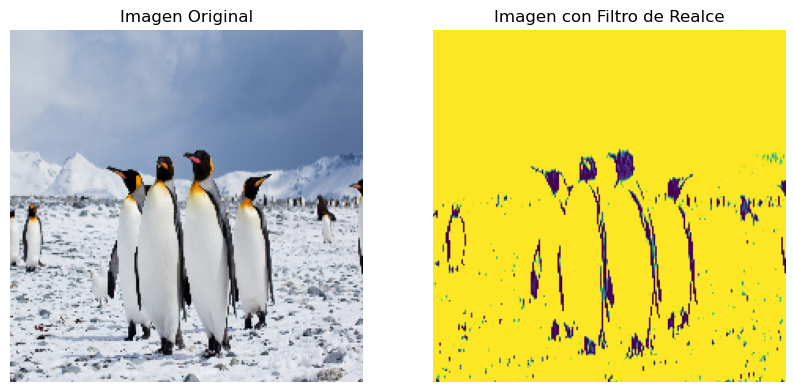

In [12]:
# Cargar imagen
image_path = "fotos/pinguino.jpeg"
image = tf.keras.preprocessing.image.load_img(image_path)
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_resized = tf.image.resize(image_array, (224, 224))  
image_batch = np.expand_dims(image_resized, axis=0)

# Definir filtro de realce
filtro_realce = np.array([
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
], dtype=np.float32).reshape(3, 3, 3, 1)

# Crear modelo con una capa convolucional
modelo_realce = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", use_bias=False, input_shape=(224, 224, 3))
])

# Asignar los pesos manualmente
modelo_realce.layers[0].set_weights([filtro_realce])

# Aplicar el filtro
filtered_image = modelo_realce.predict(image_batch)
filtered_image = np.squeeze(filtered_image)  
filtered_image = np.clip(filtered_image, 0, 255).astype("uint8")

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_resized.numpy().astype("uint8"))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap="gray")
plt.title("Imagen con Filtro de Realce")
plt.axis("off")

plt.show()


Tres filtros a la vez

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


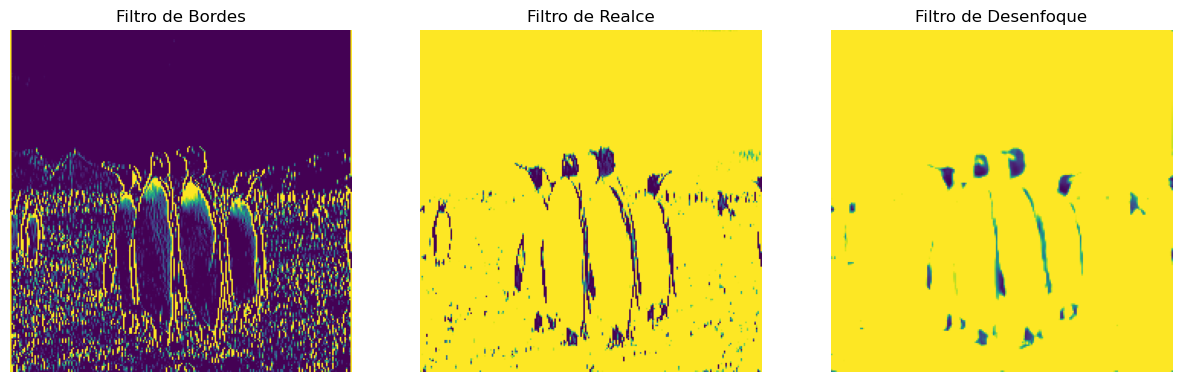

In [13]:
# Definir tres filtros diferentes
filtro_bordes = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)

filtro_realce = np.array([
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]],
    [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
], dtype=np.float32)

filtro_desenfoque = np.array([
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]],
    [[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
], dtype=np.float32)

# Agrupar los filtros en una sola matriz con forma (3, 3, 3, N filtros)
filtros = np.stack([filtro_bordes, filtro_realce, filtro_desenfoque], axis=-1)

# Crear el modelo con 3 filtros
modelo_multifiltro = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding="same", use_bias=False, input_shape=(224, 224, 3))
])

# Asignar los pesos manualmente
modelo_multifiltro.layers[0].set_weights([filtros])

# Aplicar los filtros
filtered_images = modelo_multifiltro.predict(image_batch)

# Mostrar resultados
plt.figure(figsize=(15, 5))
titulos = ["Filtro de Bordes", "Filtro de Realce", "Filtro de Desenfoque"]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(np.clip(filtered_images[0, :, :, i], 0, 255).astype("uint8"))
    plt.title(titulos[i])
    plt.axis("off")
plt.show()

Tres filtros y dos capas convolucionales

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2025-02-03 18:41:43.380028: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


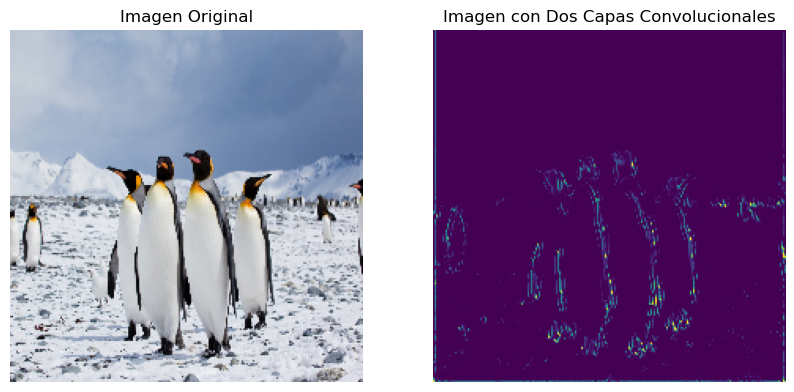

In [14]:
# Crear modelo con dos capas convolucionales
modelo_dos_capas = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding="same", use_bias=False, input_shape=(224, 224, 3),
                          activation="relu"),
    tf.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding="same", activation="relu")
])
# Asignar los pesos manualmente
modelo_dos_capas.layers[0].set_weights([filtros])

# Aplicar las convoluciones
filtered_image = modelo_dos_capas.predict(image_batch)
filtered_image = np.mean(filtered_image[0], axis=-1)  # Promedio de los canales para visualizar en escala de grises
filtered_image = np.clip(filtered_image, 0, 255).astype("uint8")

# Mostrar imagen original y resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_resized.numpy().astype("uint8"))
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Imagen con Dos Capas Convolucionales")
plt.axis("off")

plt.show()
